# 3 Custom Environments
In this task you are asked to create a environment for a reinforcement agent. It's common to create environments for agents by using the openai gym interface. It creates a good baseline for what is necessary to train a RL agent and makes it easy to try out different environments on the same algorithm.
If you need more information take a look at the documentation https://www.gymlibrary.ml/.
You can find the implementation of all official enviroments on GitHub: https://github.com/openai/gym/tree/master/gym/envs if you need some examples. 

In [13]:
pip install gym==0.21.0

Note: you may need to restart the kernel to use updated packages.


In [14]:
import gym
import numpy as np
import time
from IPython.display import display, clear_output

## 3.1 The Environment
A openai gym environment consists of at least 3 methods. `__init__` the constructor which sets all the necassary values, a `step` function, which describes the behaviour of the environment and a `reset` function, which resets the starting state of the environment. In addition to that usually a `render` function is provided to visualize the behaviour of the environment.

#### \__init__:
The Constructor of the environment defines all the necassary variables. To set the bounds of our environment we have to define the action_space and the observartion space. The gym.spaces library contains the necassary functions to do in our case we use gym.spaces.Discrete because we wan to only handle discrete values.
The Discrete space works a bit like a range, with some extra methods. A Linear representation of the state is helpful for tabular learning, because it makes creating a Q-Table really easy. 

#### step:
The step method takes an action and returns a tuple of the shape(observation, reward, done). The observation is the result of taking the action. The reward is the reward handet for takin given action in the previous state. The done variable is boolean and indicates if a given scenario has come to an end. 

#### reset:
The reset method rests the start state of the environment. It returns the new state of the environment.

#### render:
The render method visualizes the state of the environment. There are many different ways to do so i.e. creating a visual representation by using vector graphics or printing to the terminal. 
We want to focus on the easiest way, by printing the state. Find a good and easily printable representation of the internal state (i.e. a numpy array) and print it. To print over the last output you can call the  function before you print the state.

### Encoding and decoding
This functions are not necessary for a gym environment. However it might be usefull do write some functions that encode and decode the linearized state to a 2D imensional Form and back.

#### decode_action
returns the action refering to the index of the action

#### decode_state
returns a 2D representation of the linear state

#### encode_state
returns a linear representation of the 2D state.


### Task 3.1.1
- Create a two dimensional, discrete environment of the size 10x10.
- Each episode the agent should start at a random position, while the target always stays at the same position.
- The agent should be able to move in all 4 directions, If the agent hits a wall it should do nothing.
- An episode ends if the agent reaches the target.
- Reaching the target results in a reward of 10, while every other action should give a small negative reward.

In [15]:
class CustomEnv(gym.Env):
    metadata = {"render.modes": ["human"]}

    def __init__(self):
        super(CustomEnv, self).__init__()

        self.action_space = gym.spaces.Discrete(4)

        self.observation_space = gym.spaces.Discrete(10 * 10)

        self.agent_state = np.random.randint(0, 9, 2)
        self.original_agent_state = self.agent_state
        self.target_state = [2, 2]

    def step(self, action):
        # Write the step method for your enviroment. Make sure you agent does not go out of bounds
        # by performing the action.
        assert self.action_space.contains(action), "%r (%s) invalid" % (
            action,
            type(action),
        )
        self.agent_state += self.decode_action(action)

        if self.agent_state[0] < 0:
            self.agent_state[0] = 0
        elif self.agent_state[0] > 9:
            self.agent_state[0] = 9
        if self.agent_state[1] < 0:
            self.agent_state[1] = 0
        elif self.agent_state[1] > 9:
            self.agent_state[1] = 9

        reward = -1
        done = False
        # check for ending condition
        if np.array_equal(self.agent_state, self.target_state):
            reward = 10
            done = True

        return (self.encode_state(self.agent_state), reward, done, _)

    def reset(self):
        # Write the reset method that results in the starting state
        self.agent_state = self.original_agent_state
        return self.encode_state(self.agent_state)

    def render(self):
        print(" " + "_" * 10 * 3 + " ")

        for i in range(10):
            print("|", end="")
            for j in range(10):
                print(" ", end="")
                if np.array_equal([i, j], self.agent_state):
                    print("A", end="")
                elif np.array_equal([i, j], self.target_state):
                    print("T", end="")
                else:
                    print("_", end="")
                print(" ", end="")
            print("|")

    def decode_action(self, action):
        # decode a linear action to 2D
        return [[-1, 0], [0, 1], [1, 0], [0, -1]][action]

    def decode_state(self, state):
        # decode a linear state to 2D
        return [state // 10, state % 10]

    def encode_state(self, state):
        # encode a 2D state in 1D
        assert len(state) == 2
        coord = state[0] + state[1] * 10
        assert coord >= 0 and coord < 100, "Invalid state: %s" % state
        return coord

## 3.2 Test with a random agent
The following cell allows you to test your enviroment with a random agent.

In [16]:
env = CustomEnv()
done = False
i = 50  # added a manual stop so this doesnt run into eternity everytime

while done == False and i > 0:
    a = env.action_space.sample()
    _, _, done, _ = env.step(a)
    clear_output(wait=True)
    env.render()
    time.sleep(0.1)
    i -= 1

 ______________________________ 
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  T  _  A  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |


## Task 3.3 Test with a Q-Learning Agent
In the previous task we wrote an agent that used the SARSA algorithm. Now we want to use a similar algorithm, Q-Learning, to solve your own custom environment. And of course visualise your training progress (Cumulative rewards over time).

The main difference between SARSA and Q-Learning is the way the Q-Values are calculated. Therefore, you can recycle most of your code.

In [17]:
def evaluate(policy):
    # evaluate a policy by running 20 independent episodes
    scores = []
    for i in range(20):
        obs = env.reset()
        score = 0
        while True:
            action = policy(obs)
            obs, reward, done, _ = env.step(action)
            score += reward
            if done:
                break
        scores.append(score)

    return scores

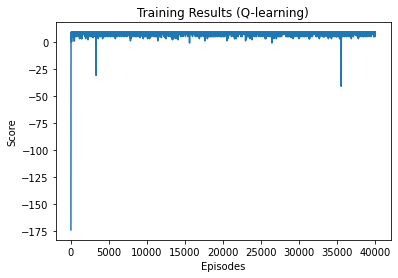

In [18]:
epsilon = 0.1
gamma = 0.99
learning_rate = 0.2
Q = np.zeros([env.observation_space.n, env.action_space.n])
episodes = 40000


def eps_greedy(state):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])


def update_table(s, a, delta):
    Q[s, a] += learning_rate * delta


def train():
    scores = []
    for _ in range(episodes):
        s = env.reset()
        score = 0

        while True:
            a = eps_greedy(s)
            next_s, r, done, _ = env.step(a)

            old_value = Q[s, a]
            next_max = np.max(Q[next_s])

            Q[s, a] = (1 - learning_rate) * old_value + learning_rate * (
                r + gamma * next_max
            )
            s = next_s
            score += r
            if done:
                break
        scores.append(score)
    return scores


results = train()

import matplotlib.pyplot as plt

plt.title("Training Results (Q-learning)")
plt.xlabel("Episodes")
plt.ylabel("Score")
plt.plot(results)

In [22]:
env = CustomEnv()
done = False
s = env.reset()
while done == False:

    a = np.argmax(Q[s])
    s, _, done, _ = env.step(a)

    clear_output(wait=True)
    env.render()
    time.sleep(0.1)

 ______________________________ 
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  T  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  A  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |
| _  _  _  _  _  _  _  _  _  _ |


KeyboardInterrupt: 

### Task 3.3.1 Size concerns for Tabular RL:
The table for learning our simple enviroment has the size 100x4 for now. Since we have 100 possible States and 4 actions. How much bigger would the table get if we allowed the target to be placed anywhere?  

In [20]:
# Right now we have 100 different states, since the agent can be  anywhere on
# the 10x10 grid, but the target location is static
# (so not part of the dynamic state). If we allowed for the target to be placed
# randomly, so in one of 100 different locations, we would have 100 x 100
# different possible states. So our Matrix would grow to a 10000x4 big matrix.
# If we assume the matrix is using a double precission float, the matrix would
# use 320 kB of memory (prior 3.2kB)